# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [ ]:
#Type your code here
from kagglehub import dataset_download
import pandas as pd
from sklearn.preprocessing import LabelEncoder , LabelBinarizer
import matplotlib.pyplot as plt
import os

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [ ]:
#Type your code here
dataset_path = dataset_download("muhamedumarjamil/house-price-prediction-dataset")
os.listdir(dataset_path)


['house_prices_dataset.csv']

In [ ]:
df = pd.read_csv(f'{dataset_path}/{'house_prices_dataset.csv'}')
df.head()

,square_feet,num_rooms,age,distance_to_city(km),price
0,2248.357077,3,92,22.997972,200374.090410
1,1930.867849,2,22,13.984254,268784.847337
2,2323.844269,6,33,21.500945,315020.857676
3,2761.514928,3,63,10.343638,355111.468459
4,1882.923313,7,54,25.485200,234197.123903


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [ ]:
#Type your code here
#Mengecek tipe data dari setiap kolom
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   square_feet           10000 non-null  float64
 1   num_rooms             10000 non-null  int64  
 2   age                   10000 non-null  int64  
 3   distance_to_city(km)  10000 non-null  float64
 4   price                 10000 non-null  float64
dtypes: float64(3), int64(2)
memory usage: 390.8 KB


In [ ]:
#Mengecek statistik dari masing-masing kolom numerik
df.describe()

,square_feet,num_rooms,age,distance_to_city(km),price
count,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1999.147496,4.49510,49.516900,15.362148,263011.571609
std,501.021194,1.71116,28.992336,8.325101,98336.945117
min,500.000000,2.00000,0.000000,1.000161,-95613.138249
25%,1663.704735,3.00000,24.000000,8.121636,196791.510684
50%,1998.702512,4.00000,49.000000,15.403146,262497.361236
75%,2335.540444,6.00000,75.000000,22.447530,330445.581908
max,3963.118853,7.00000,99.000000,29.993892,660168.255648


In [ ]:
#Mengecek apakah ada missing value di setiap kolom
df.isna().sum()

,0
square_feet,0
num_rooms,0
age,0
distance_to_city(km),0
price,0


In [ ]:
df.duplicated().sum()

np.int64(0)

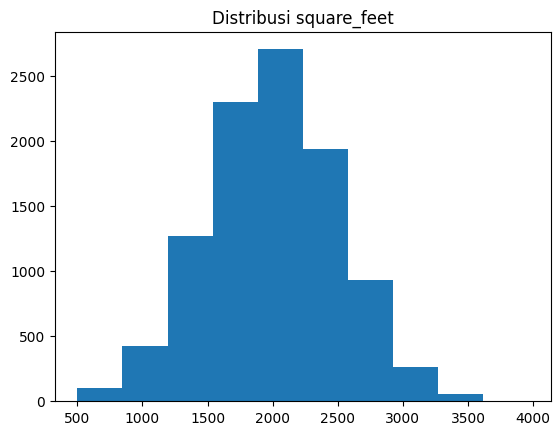

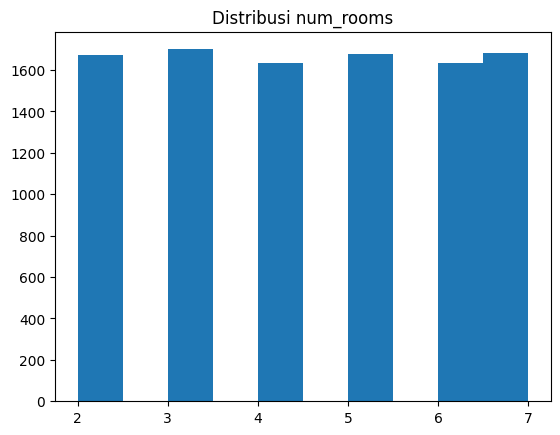

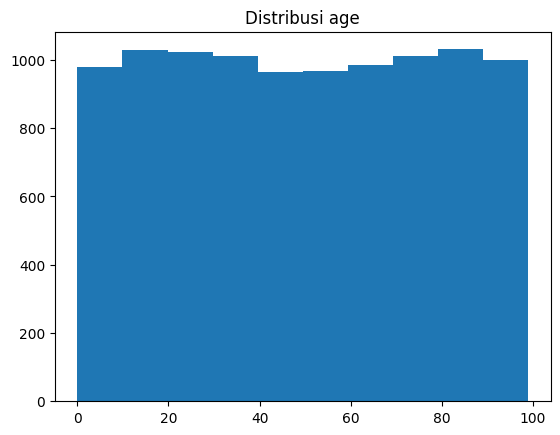

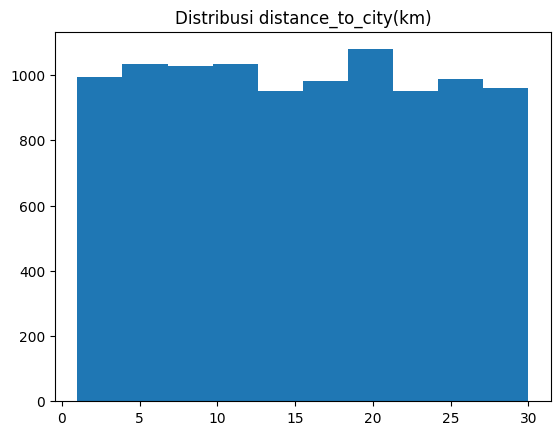

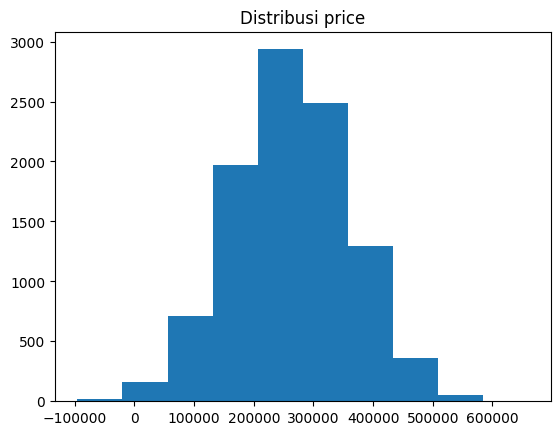

In [ ]:
for col in df.columns:
  if df[col].dtypes == "int64" or df[col].dtypes == "float64":
    plt.title(f'Distribusi {col}')
    plt.hist(df[col] , bins = 10)
    plt.show()


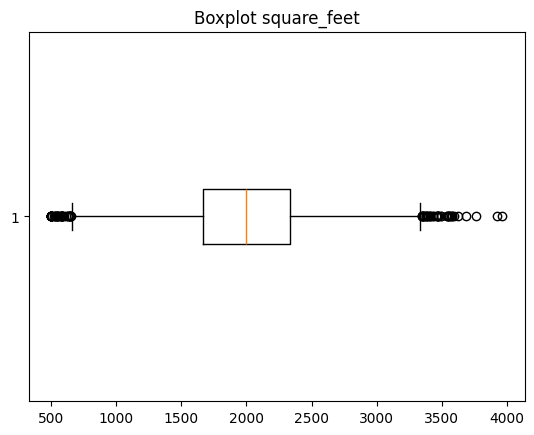

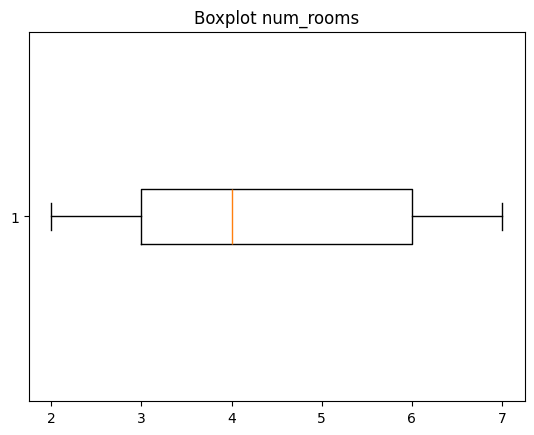

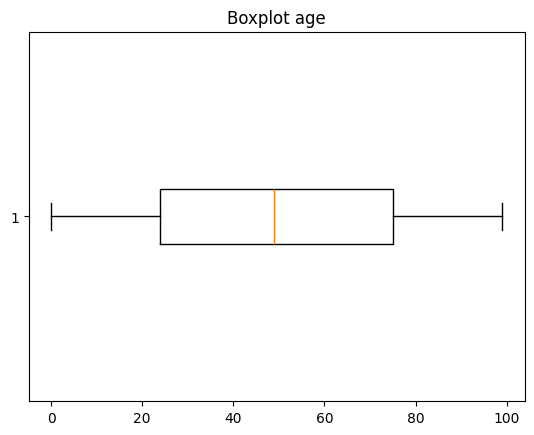

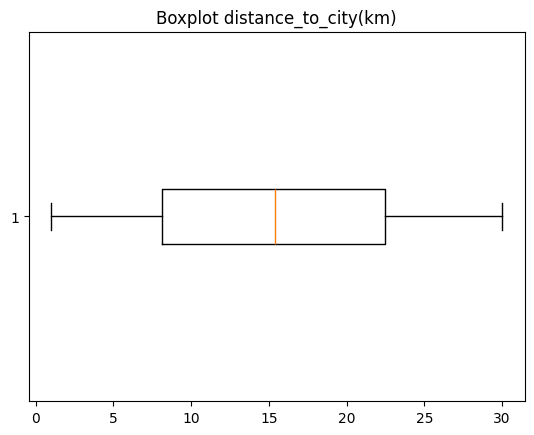

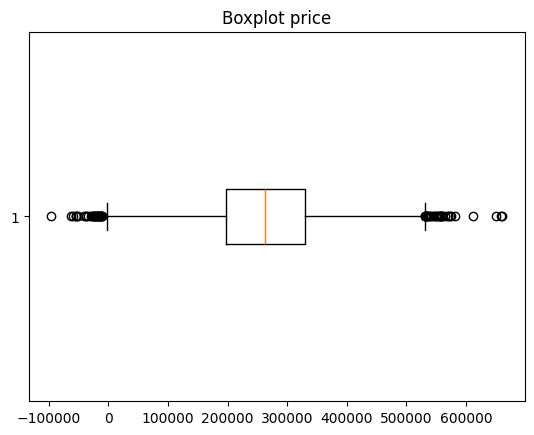

In [ ]:
for col in df.columns:
  if df[col].dtypes == 'int64' or df[col].dtypes == 'float64':
    plt.title(f'Boxplot {col}')
    plt.boxplot(df[col],vert = False)
    plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
def remove_outlier(df : pd.DataFrame , col : str):
  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)
  IQR = Q3 - Q1
  lower = Q1 - (1.5 * IQR)
  upper = Q3 + (1.5 * IQR)

  return df[~((df[col] < lower) | (df[col] > upper))]

In [ ]:
for col in df.columns :
  if df[col].dtypes == 'int64' or df[col].dtypes == 'float64':
    df = remove_outlier(df , col)

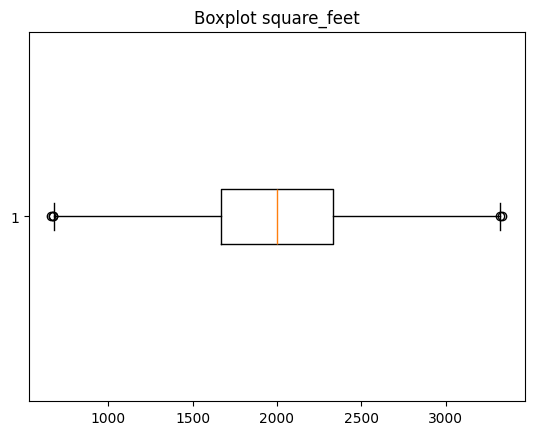

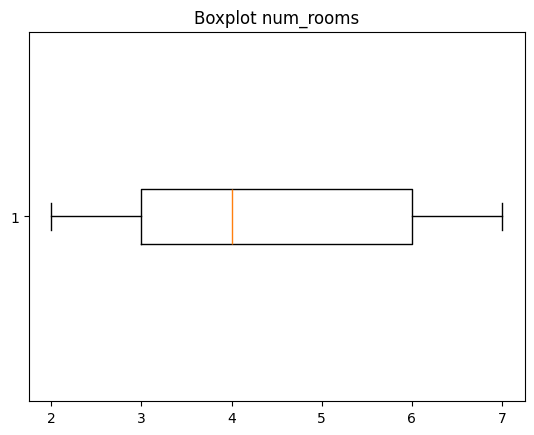

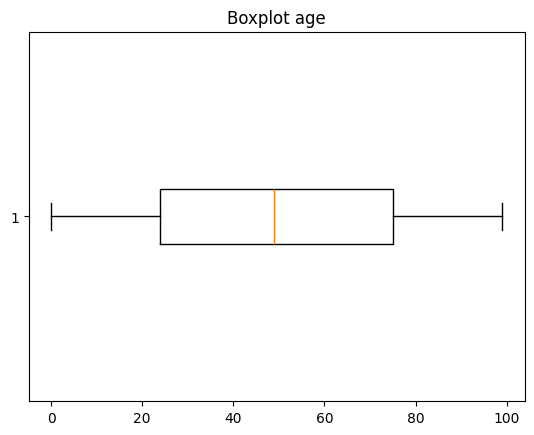

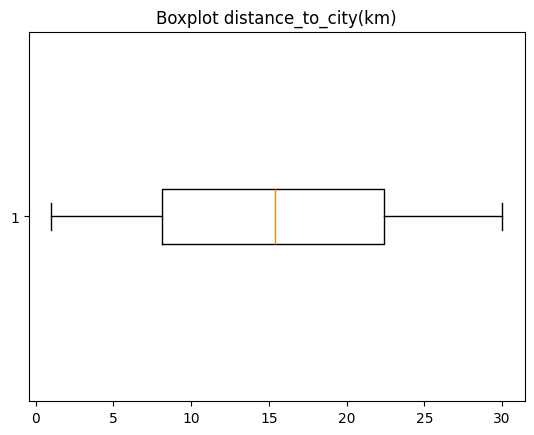

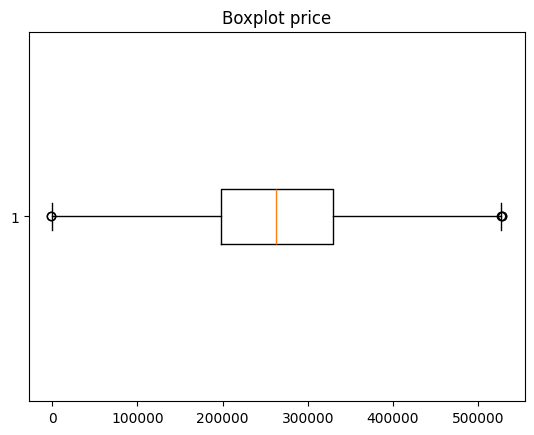

In [ ]:
for col in df.columns:
  if df[col].dtypes == 'int64' or df[col].dtypes == 'float64':
    plt.title(f'Boxplot {col}')
    plt.boxplot(df[col],vert = False)
    plt.show()

In [ ]:
df.to_csv('clean dataset.csv')